### Importando os Pacotes Utilitários

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


### Baixando os Conjuntos de Dados do Servidor

In [3]:
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/CheXpert-v1.0-small.zip', 
                      extract_dir = '/content/CheXpert-v1.0-small', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/vinbigdata.zip', 
                      extract_dir = '/content/vinbigdata/', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/images.zip', 
                      extract_dir = '/content/images/', format = 'zip')

### Organizando e Analisando os Dados - Conjunto de Testes Geral

In [93]:
dataset = pd.read_csv('/content/all_datasets.csv', index_col = 0)
dataset_diseases = dataset[((dataset['Opacity'] == 1.0) | 
                            (dataset['Atelectasis'] == 1.0) | 
                            (dataset['Pneumothorax'] == 1.0) | 
                            (dataset['Effusion'] == 1.0)) & 
                            (dataset['Nodule/Mass'] == 0.0) &
                            (dataset['No Finding'] == 0.0)].copy()

dataset_diseases.drop(labels = 'Nodule/Mass', axis = 1, inplace = True)
dataset_diseases.drop(labels = 'No Finding', axis = 1, inplace = True)

dataset_no_diseases = dataset[dataset['No Finding'] == 1.0].copy()

dataset_no_diseases.drop(labels = 'Nodule/Mass', axis = 1, inplace = True)
dataset_no_diseases.drop(labels = 'No Finding', axis = 1, inplace = True)

dataset_diseases['Abnormal'] = 1.0
dataset_no_diseases['Abnormal'] = 0.0

dataset = pd.concat((dataset_diseases, dataset_no_diseases))

Text(0, 0.5, 'Imagens')

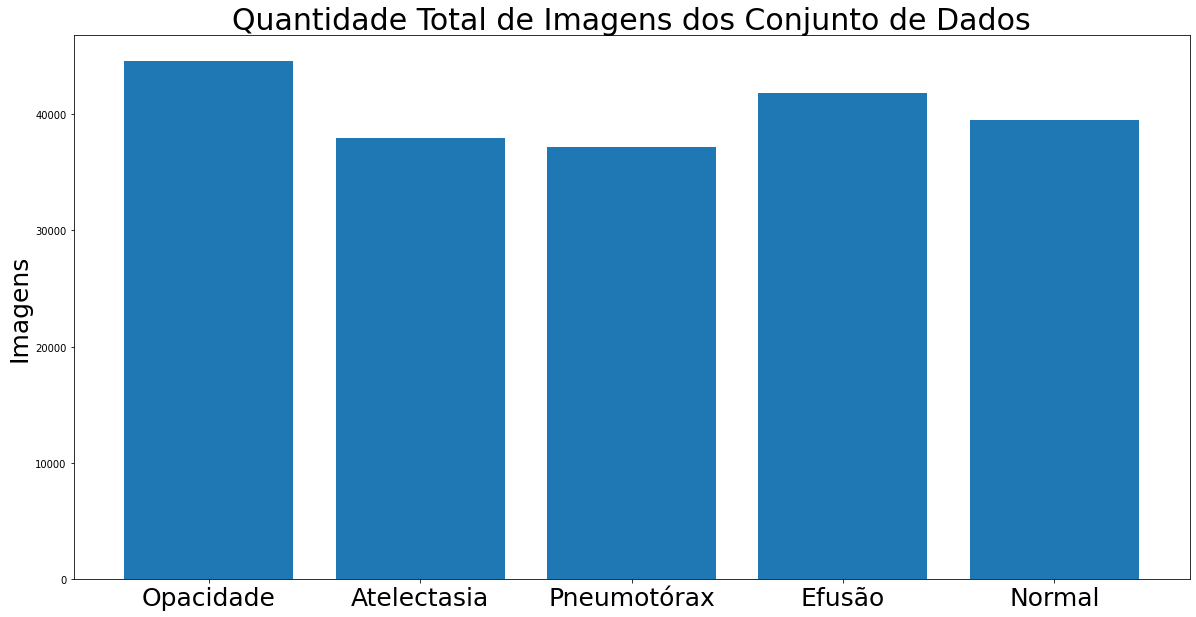

In [94]:
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion', 'Abnormal']

count_findings = list()
for finding in findings:
  if finding != 'Abnormal':
    count = dict(dataset[finding].value_counts())[1.0]
    count_findings.append(count)
  else:
    count = dict(dataset[finding].value_counts())[0.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão', 'Normal']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 25)

In [95]:
opacity = np.array(dataset[findings[0]]).astype(str)
atelectasis = np.array(dataset[findings[1]]).astype(str)
pneumothorax = np.array(dataset[findings[2]]).astype(str)
effusion = np.array(dataset[findings[3]]).astype(str)
normal = np.array(dataset[findings[4]]).astype(str)

all_labels = np.zeros(effusion.shape).astype(str)
for index in range(0, len(opacity)):
  all_labels[index] = opacity[index] + atelectasis[index] + pneumothorax[index]
  all_labels[index] += effusion[index] + normal[index]

dataset['labels_ref'] = all_labels

In [96]:
dataset, test_geral_dataset = train_test_split(dataset, test_size = 0.1, 
                                               random_state = 42, 
                                               stratify = dataset['labels_ref'])

Text(0, 0.5, 'Imagens')

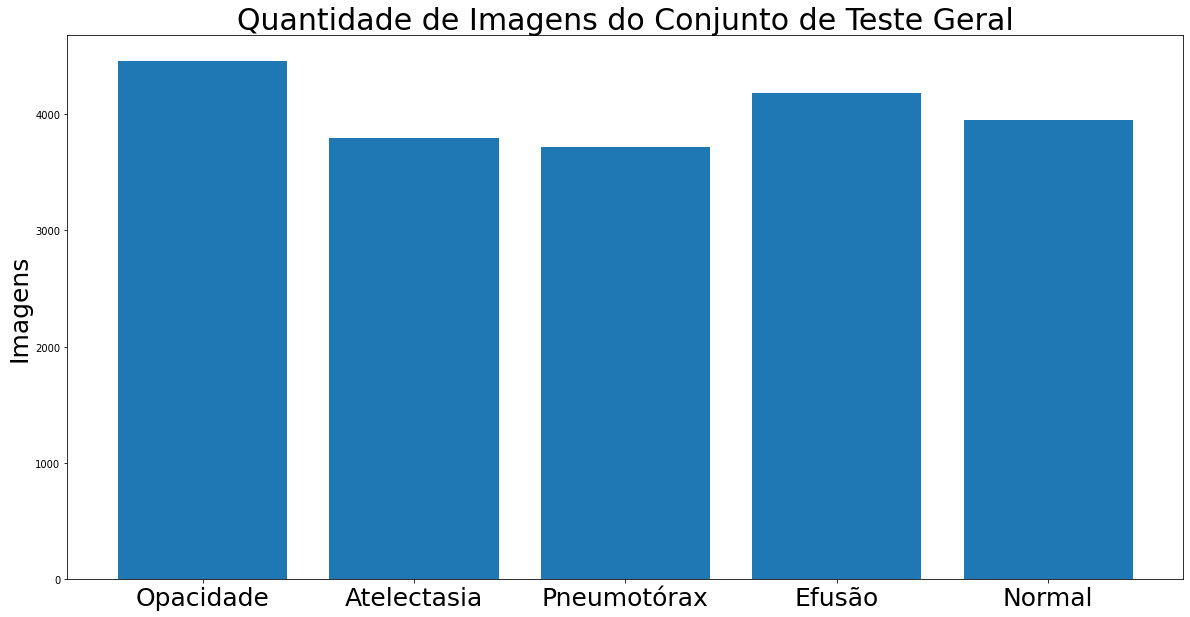

In [97]:
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion', 'Abnormal']

count_findings = list()
for finding in findings:
  if finding != 'Abnormal':
    count = dict(test_geral_dataset[finding].value_counts())[1.0]
    count_findings.append(count)
  else:
    count = dict(test_geral_dataset[finding].value_counts())[0.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão', 'Normal']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Quantidade de Imagens do Conjunto de Teste Geral', size = 30)
plt.ylabel('Imagens', size = 25)

In [98]:
dataset.drop(labels = 'labels_ref', axis = 1, inplace = True)
test_geral_dataset.drop(labels = 'labels_ref', axis = 1, inplace = True)
test_geral_dataset.to_csv(path_or_buf = 'test_geral_dataset.csv')

### Organizando e Analisando os Dados - Detecção de Anormalidades

Text(0, 0.5, 'Imagens')

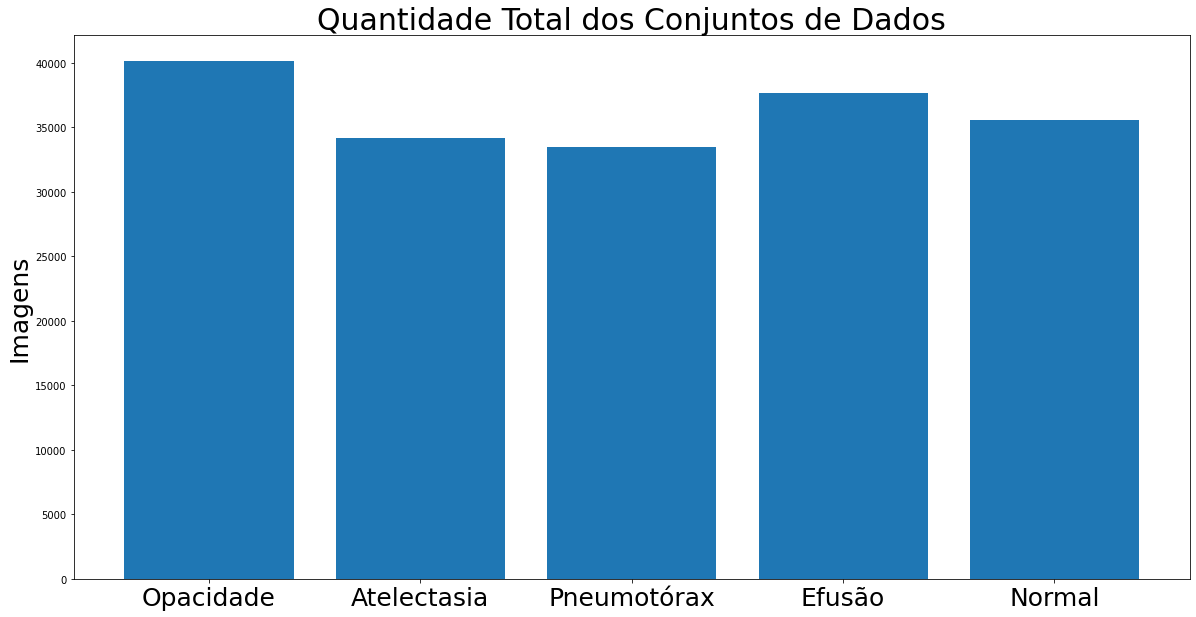

In [99]:
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion', 'Abnormal']

count_findings = list()
for finding in findings:
  if finding != 'Abnormal':
    count = dict(dataset[finding].value_counts())[1.0]
    count_findings.append(count)
  else:
    count = dict(dataset[finding].value_counts())[0.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão', 'Normal']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Quantidade Total dos Conjuntos de Dados', size = 30)
plt.ylabel('Imagens', size = 25)

In [100]:
dataset_diseases = dataset[dataset['Abnormal'] == 1.0].copy()
dataset_no_diseases = dataset[dataset['Abnormal'] == 0.0].copy()

In [101]:
opacity = np.array(dataset_diseases['Opacity']).astype(str)
atelectasis = np.array(dataset_diseases['Atelectasis']).astype(str)
pneumothorax = np.array(dataset_diseases['Pneumothorax']).astype(str)
effusion = np.array(dataset_diseases['Effusion']).astype(str)

all_labels = np.zeros(effusion.shape).astype(str)
for index in range(0, len(opacity)):
  all_labels[index] = opacity[index] + atelectasis[index] + pneumothorax[index]
  all_labels[index] += effusion[index]

dataset_diseases['labels_ref'] = all_labels

In [102]:
test_size = dataset_no_diseases.shape[0] / dataset_diseases.shape[0]
_, dataset_diseases = train_test_split(dataset_diseases, test_size = test_size, 
                                       random_state = 42, 
                                       stratify = dataset_diseases['labels_ref'])

dataset_ab_detection = pd.concat((dataset_diseases, dataset_no_diseases))

Text(0, 0.5, 'Imagens')

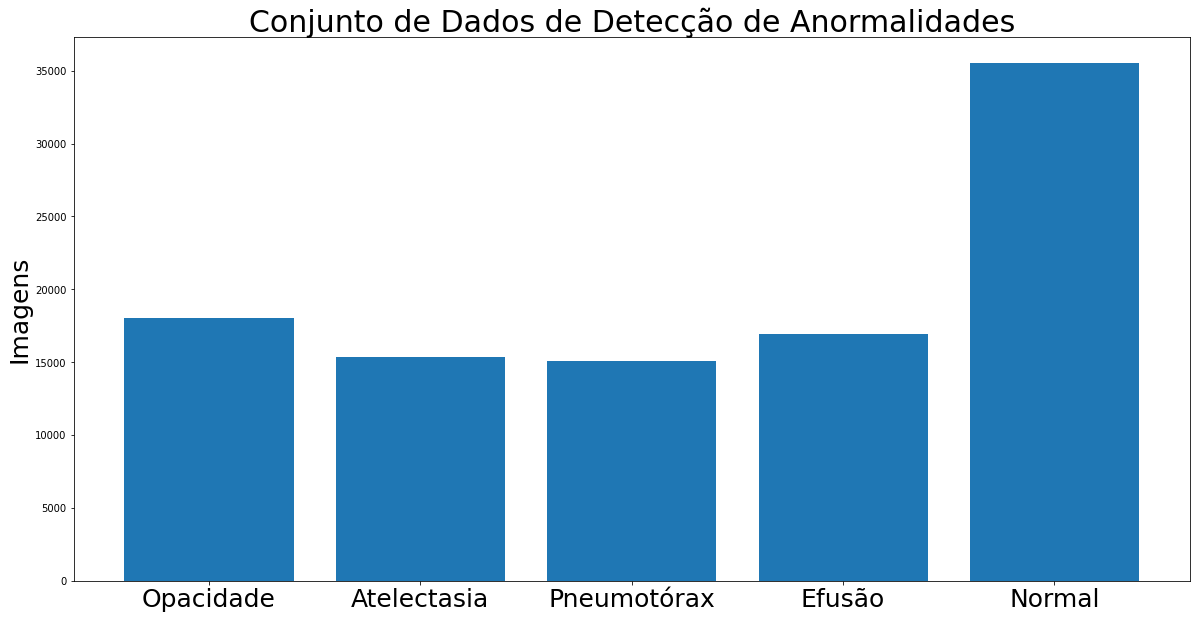

In [106]:
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion', 'Abnormal']

count_findings = list()
for finding in findings:
  if finding != 'Abnormal':
    count = dict(dataset_ab_detection[finding].value_counts())[1.0]
    count_findings.append(count)
  else:
    count = dict(dataset_ab_detection[finding].value_counts())[0.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão', 'Normal']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Conjunto de Dados de Detecção de Anormalidades', size = 30)
plt.ylabel('Imagens', size = 25)

Text(0, 0.5, 'Imagens')

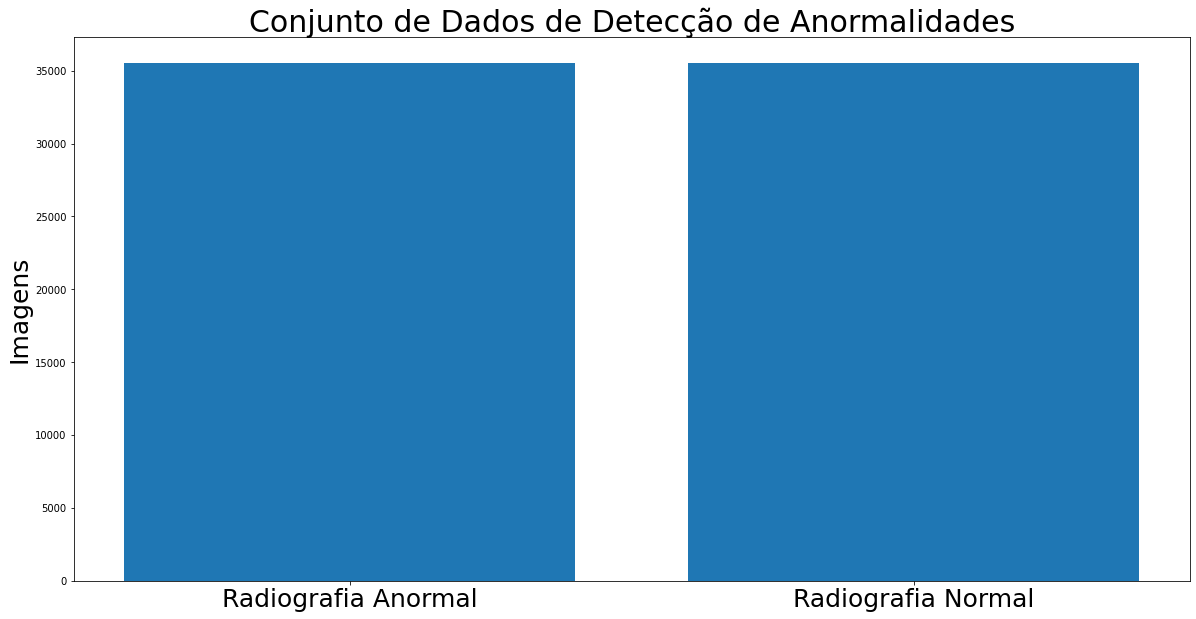

In [107]:
count_findings = list()
count_findings.append(dict(dataset_ab_detection['Abnormal'].value_counts())[1.0])
count_findings.append(dict(dataset_ab_detection['Abnormal'].value_counts())[0.0])

plt.figure(figsize = (20, 10))
plt.bar(['Radiografia Anormal', 'Radiografia Normal'], count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Conjunto de Dados de Detecção de Anormalidades', size = 30)
plt.ylabel('Imagens', size = 25)

In [109]:
dataset_ab_detection.drop(labels = 'labels_ref', axis = 1, inplace = True)
dataset_ab_detection.to_csv(path_or_buf = 'dataset_ab_detection.csv')

### Organizando e Analisando os Dados - Classificação de Anormalidades

Text(0, 0.5, 'Imagens')

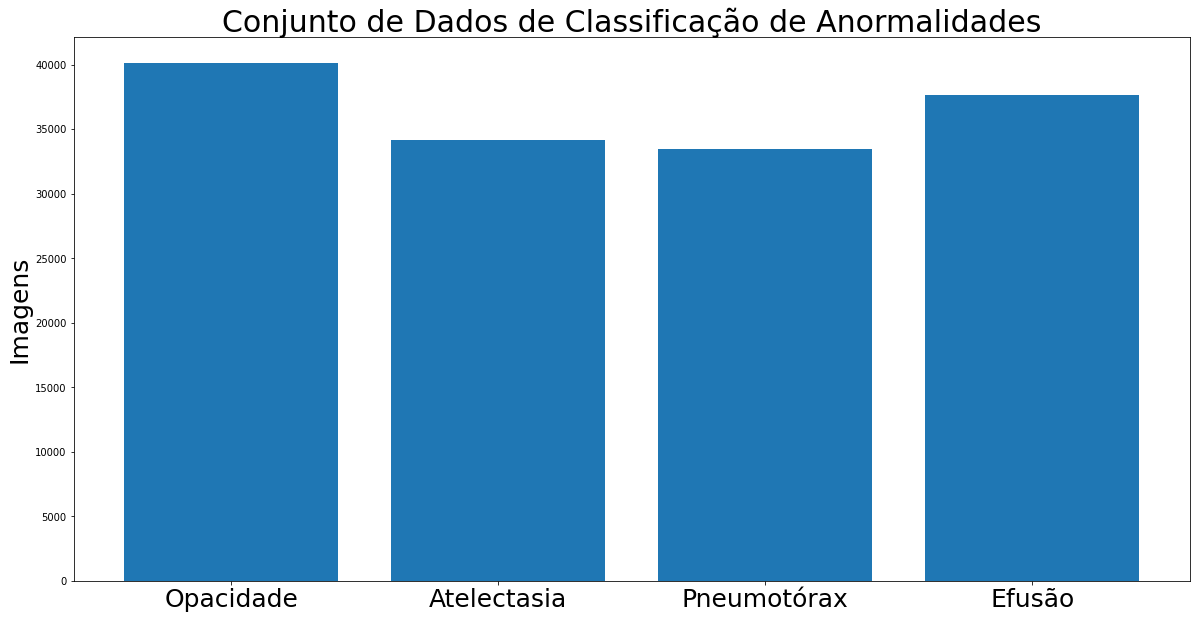

In [115]:
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion']

count_findings = list()
for finding in findings:
    count = dict(dataset[finding].value_counts())[1.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Conjunto de Dados de Classificação de Anormalidades', size = 30)
plt.ylabel('Imagens', size = 25)

In [114]:
dataset.to_csv(path_or_buf = 'dataset_ab_classification.csv')